# Table of Contents
 <p><div class="lev1"><a href="#Bottle-brush-with-RW-angular-loop-orientation"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bottle brush with RW angular loop orientation</a></div><div class="lev2"><a href="#No-drift"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>No drift</a></div><div class="lev2"><a href="#With-drift"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>With drift</a></div><div class="lev1"><a href="#Bottle-brush-with-OU-angular-loop-orientation-(approximate)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bottle brush with OU angular loop orientation (approximate)</a></div><div class="lev1"><a href="#Experimental"><span class="toc-item-num">3&nbsp;&nbsp;</span>Experimental</a></div><div class="lev1"><a href="#Bottle-brush-with-random-angular-loop-orientation"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bottle brush with random angular loop orientation</a></div>

In [2]:
#import glob, os, sys, shelve, itertools
#from collections import OrderedDict
import matplotlib.pyplot as plt

%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

import numpy as np
from ipywidgets.widgets.interaction import interact
import ipywidgets.widgets as widgets

import scipy
import scipy.stats as st

# from matplotlib import gridspec
# from mirnylib import plotting

# import seaborn as sns
# sns.set_style('white')
# sns.set_palette('deep')
# sns.set_context('talk')



In [3]:
MIN_LOG10_S = -1
MAX_LOG10_S = 4
GLUE_AT = 2
EXP_LOOP_SIZE = 80000

In [18]:
# import sys
# sys.path.append(pathlib.Path('../').resolve().as_posix())
# import smcviz
# import openmmlib

# REFSC_60m = smcviz.scalings['WT-20150609-60m-R1']

# REFSC_CAPH1_R1_30m = smcviz.scalings['CAPH1-20160726-30m-R1']
# REFSC_CAPH1_R2_30m = smcviz.scalings['CAPH1-20160919-30m-R2']

# REFSC_CAPH1_R1_60m = smcviz.scalings['CAPH1-20160726-60m-R1']
# REFSC_CAPH1_R2_60m = smcviz.scalings['CAPH1-20160919-60m-R2']

# REFSC_CAPH2_R1_30m = smcviz.scalings['CAPH2-20160714-30m-R1']
# REFSC_CAPH2_R2_30m = smcviz.scalings['CAPH2-20160830-30m-R2']

In [4]:
# REFSC_7m = smcviz.scalings['WT-20151009-7m-R1']

REFSC_7m = np.array([[  1.06010000e+03,   1.18810000e+03,   1.33210000e+03,
          1.49310000e+03,   1.67360000e+03,   1.87610000e+03,
          2.10310000e+03,   2.35760000e+03,   2.64310000e+03,
          2.96310000e+03,   3.32160000e+03,   3.72310000e+03,
          4.17310000e+03,   4.67810000e+03,   5.24410000e+03,
          5.87860000e+03,   6.58960000e+03,   7.38660000e+03,
          8.28010000e+03,   9.28160000e+03,   1.04046000e+04,
          1.16631000e+04,   1.30736000e+04,   1.46551000e+04,
          1.64276000e+04,   1.84146000e+04,   2.06421000e+04,
          2.31386000e+04,   2.59371000e+04,   2.90741000e+04,
          3.25911000e+04,   3.65331000e+04,   4.09516000e+04,
          4.59051000e+04,   5.14576000e+04,   5.76816000e+04,
          6.46581000e+04,   7.24786000e+04,   8.12451000e+04,
          9.10716000e+04,   1.02087100e+05,   1.14434600e+05,
          1.28275600e+05,   1.43791100e+05,   1.61182600e+05,
          1.80677600e+05,   2.02531100e+05,   2.27027600e+05,
          2.54486600e+05,   2.85267100e+05,   3.19770600e+05,
          3.58447600e+05,   4.01802600e+05,   4.50401100e+05,
          5.04877600e+05,   5.65943600e+05,   6.34395600e+05,
          7.11126600e+05,   7.97138100e+05,   8.93553100e+05,
          1.00162960e+06,   1.12277810e+06,   1.25858010e+06,
          1.41080710e+06,   1.58144610e+06,   1.77272410e+06,
          1.98713760e+06,   2.22748460e+06,   2.49690160e+06,
          2.79890560e+06,   3.13743760e+06,   3.51691460e+06,
          3.94229010e+06,   4.41911560e+06,   4.95361410e+06,
          5.55276110e+06,   6.22437510e+06,   6.97722160e+06,
          7.82112610e+06,   8.76710210e+06,   9.82749510e+06,
          1.10161446e+07,   1.23485626e+07,   1.38421381e+07,
          1.55163641e+07,   1.73930901e+07,   1.94968086e+07,
          2.18549741e+07,   2.44983631e+07,   2.74614741e+07,
          3.07829776e+07,   3.45062216e+07,   3.86797966e+07,
          4.33581716e+07,   4.86024026e+07,   5.44809301e+07,
          6.10704741e+07,   6.84570326e+07,   7.67370056e+07,
          8.60184526e+07,   9.64225031e+07,   1.08084938e+08,
          1.21157961e+08,   1.35812184e+08,   1.52238855e+08,
          1.70652355e+08,   1.91292994e+08,   2.14430146e+08,
          2.40365768e+08,   2.69438340e+08,   3.02027280e+08,
          3.38557897e+08,   3.79506943e+08,   4.25408832e+08,
          4.76862619e+08,   5.34539812e+08,   5.99193141e+08,
          6.71666379e+08,   7.52905356e+08,   8.43970300e+08,
          9.46049675e+08],
       [  1.36025607e-05,   1.34046188e-05,   1.36574460e-05,
          1.32345444e-05,   1.29639579e-05,   1.25128973e-05,
          1.19243258e-05,   1.13629686e-05,   1.05735869e-05,
          9.77219368e-06,   8.84240339e-06,   8.06609568e-06,
          7.14465216e-06,   6.31499827e-06,   5.51226795e-06,
          4.76879398e-06,   4.18247063e-06,   3.59360570e-06,
          3.13764287e-06,   2.75338562e-06,   2.45340402e-06,
          2.18181840e-06,   1.94339264e-06,   1.77000763e-06,
          1.60003804e-06,   1.45911904e-06,   1.34797427e-06,
          1.22491760e-06,   1.13661127e-06,   1.05464027e-06,
          9.74862144e-07,   9.07692404e-07,   8.52651873e-07,
          7.98028535e-07,   7.45706359e-07,   7.00864258e-07,
          6.58708816e-07,   6.24673757e-07,   5.86377722e-07,
          5.54947671e-07,   5.26503076e-07,   4.98313350e-07,
          4.72124666e-07,   4.45941670e-07,   4.24237778e-07,
          3.99209011e-07,   3.77865371e-07,   3.54132789e-07,
          3.35382423e-07,   3.13948076e-07,   2.94289478e-07,
          2.74606656e-07,   2.58023724e-07,   2.39221238e-07,
          2.22871782e-07,   2.06780001e-07,   1.91610943e-07,
          1.77610080e-07,   1.64602895e-07,   1.52824997e-07,
          1.41911209e-07,   1.31598674e-07,   1.21713280e-07,
          1.12660971e-07,   1.03716735e-07,   9.49234670e-08,
          8.53526672e-08,   7.54735421e-08,   6.50218799e-08,
          5.39394069e-08,   4.37518502e-08,   3.52473806e-08,
          2.90136753e-08,   2.41306659e-08,   2.01100335e-08,
          1.69164445e-08,   1.45610547e-08,   1.27782927e-08,
          1.15661752e-08,   1.05925240e-08,   9.75479526e-09,
          8.97489348e-09,   8.23350430e-09,   7.44221577e-09,
          6.66177792e-09,   5.95105691e-09,   5.34956968e-09,
          4.80811488e-09,   4.37376310e-09,   3.93143736e-09,
          3.59289091e-09,   3.28204473e-09,   3.05535485e-09,
          2.87612295e-09,   2.73886018e-09,   2.63728473e-09,
          2.57426311e-09,   2.50288251e-09,   2.38974135e-09,
          2.27761691e-09,   2.12083309e-09,   1.95334581e-09,
          1.75004353e-09,              np.nan,              np.nan,
                     np.nan,              np.nan,              np.nan,
                     np.nan,              np.nan,              np.nan,
                     np.nan,              np.nan,              np.nan,
                     np.nan,              np.nan,              np.nan,
                     np.nan,              np.nan,              np.nan,
                     np.nan]])

In [5]:
# REFSC_10m = smcviz.scalings['WT-92Pphase-10m-R1']

REFSC_10m =np.array([[  1.06010000e+03,   1.18810000e+03,   1.33210000e+03,
          1.49310000e+03,   1.67360000e+03,   1.87610000e+03,
          2.10310000e+03,   2.35760000e+03,   2.64310000e+03,
          2.96310000e+03,   3.32160000e+03,   3.72310000e+03,
          4.17310000e+03,   4.67810000e+03,   5.24410000e+03,
          5.87860000e+03,   6.58960000e+03,   7.38660000e+03,
          8.28010000e+03,   9.28160000e+03,   1.04046000e+04,
          1.16631000e+04,   1.30736000e+04,   1.46551000e+04,
          1.64276000e+04,   1.84146000e+04,   2.06421000e+04,
          2.31386000e+04,   2.59371000e+04,   2.90741000e+04,
          3.25911000e+04,   3.65331000e+04,   4.09516000e+04,
          4.59051000e+04,   5.14576000e+04,   5.76816000e+04,
          6.46581000e+04,   7.24786000e+04,   8.12451000e+04,
          9.10716000e+04,   1.02087100e+05,   1.14434600e+05,
          1.28275600e+05,   1.43791100e+05,   1.61182600e+05,
          1.80677600e+05,   2.02531100e+05,   2.27027600e+05,
          2.54486600e+05,   2.85267100e+05,   3.19770600e+05,
          3.58447600e+05,   4.01802600e+05,   4.50401100e+05,
          5.04877600e+05,   5.65943600e+05,   6.34395600e+05,
          7.11126600e+05,   7.97138100e+05,   8.93553100e+05,
          1.00162960e+06,   1.12277810e+06,   1.25858010e+06,
          1.41080710e+06,   1.58144610e+06,   1.77272410e+06,
          1.98713760e+06,   2.22748460e+06,   2.49690160e+06,
          2.79890560e+06,   3.13743760e+06,   3.51691460e+06,
          3.94229010e+06,   4.41911560e+06,   4.95361410e+06,
          5.55276110e+06,   6.22437510e+06,   6.97722160e+06,
          7.82112610e+06,   8.76710210e+06,   9.82749510e+06,
          1.10161446e+07,   1.23485626e+07,   1.38421381e+07,
          1.55163641e+07,   1.73930901e+07,   1.94968086e+07,
          2.18549741e+07,   2.44983631e+07,   2.74614741e+07,
          3.07829776e+07,   3.45062216e+07,   3.86797966e+07,
          4.33581716e+07,   4.86024026e+07,   5.44809301e+07,
          6.10704741e+07,   6.84570326e+07,   7.67370056e+07,
          8.60184526e+07,   9.64225031e+07,   1.08084938e+08,
          1.21157961e+08,   1.35812184e+08,   1.52238855e+08,
          1.70652355e+08,   1.91292994e+08,   2.14430146e+08,
          2.40365768e+08,   2.69438340e+08,   3.02027280e+08,
          3.38557897e+08,   3.79506943e+08,   4.25408832e+08,
          4.76862619e+08,   5.34539812e+08,   5.99193141e+08,
          6.71666379e+08,   7.52905356e+08,   8.43970300e+08,
          9.46049675e+08],
       [  5.12401928e-06,   5.21053010e-06,   5.43670420e-06,
          5.51432327e-06,   5.80338727e-06,   5.74049234e-06,
          5.81727055e-06,   5.86260055e-06,   5.73426592e-06,
          5.67409064e-06,   5.51083511e-06,   5.34948672e-06,
          5.15669658e-06,   4.94856413e-06,   4.69226356e-06,
          4.42405745e-06,   4.17199337e-06,   3.90491288e-06,
          3.61900127e-06,   3.39410568e-06,   3.12408496e-06,
          2.89812736e-06,   2.69193214e-06,   2.45217645e-06,
          2.27232962e-06,   2.09816377e-06,   1.93096590e-06,
          1.78977445e-06,   1.64921804e-06,   1.52646390e-06,
          1.41841330e-06,   1.32360411e-06,   1.22847270e-06,
          1.15095084e-06,   1.08174275e-06,   1.01408849e-06,
          9.55430430e-07,   8.98691236e-07,   8.58129012e-07,
          8.08875083e-07,   7.64637589e-07,   7.31114664e-07,
          6.92200849e-07,   6.60665470e-07,   6.31291407e-07,
          5.97896042e-07,   5.68835030e-07,   5.42300591e-07,
          5.15300288e-07,   4.88965839e-07,   4.61142954e-07,
          4.36771896e-07,   4.13572974e-07,   3.90778564e-07,
          3.69347980e-07,   3.48814164e-07,   3.28971645e-07,
          3.11824481e-07,   2.93789418e-07,   2.76521240e-07,
          2.59964798e-07,   2.43863255e-07,   2.27076162e-07,
          2.08273698e-07,   1.87344523e-07,   1.63703500e-07,
          1.37869309e-07,   1.11120277e-07,   8.64569185e-08,
          6.59059683e-08,   4.95332916e-08,   3.70433346e-08,
          2.74404981e-08,   2.04434070e-08,   1.54896441e-08,
          1.21378868e-08,   9.97291256e-09,   8.51308568e-09,
          7.41821013e-09,   6.61411826e-09,   5.95786854e-09,
          5.33640193e-09,   4.72705901e-09,   4.18209989e-09,
          3.59923398e-09,   3.03972761e-09,   2.54110466e-09,
          2.11420249e-09,   1.73818067e-09,   1.44410727e-09,
          1.16081550e-09,   9.36761032e-10,   7.76385942e-10,
          6.58526750e-10,   5.62581388e-10,   4.95524509e-10,
          4.62136925e-10,   4.14579522e-10,   4.02640302e-10,
          3.91300897e-10,   3.52900340e-10,   3.59177371e-10,
          4.74865558e-10,              np.nan,              np.nan,
                     np.nan,              np.nan,              np.nan,
                     np.nan,              np.nan,              np.nan,
                     np.nan,              np.nan,              np.nan,
                     np.nan,              np.nan,              np.nan,
                     np.nan,              np.nan,              np.nan,
                     np.nan]])

In [19]:
# REFSC_30m = smcviz.scalings['WT-20150609-30m-R1']

REFSC_30m = (
    np.array([1060.0999999999999, 1188.0999999999999, 1332.0999999999999, 1493.0999999999999, 1673.5999999999999, 1876.0999999999999, 2103.0999999999999, 2357.5999999999999, 2643.0999999999999, 2963.0999999999999, 3321.5999999999999, 3723.0999999999999, 4173.1000000000004, 4678.1000000000004, 5244.1000000000004, 5878.6000000000004, 6589.6000000000004, 7386.6000000000004, 8280.1000000000004, 9281.6000000000004, 10404.6, 11663.1, 13073.6, 14655.1, 16427.599999999999, 18414.599999999999, 20642.099999999999, 23138.599999999999, 25937.099999999999, 29074.099999999999, 32591.099999999999, 36533.099999999999, 40951.599999999999, 45905.099999999999, 51457.599999999999, 57681.599999999999, 64658.100000000006, 72478.600000000006, 81245.100000000006, 91071.600000000006, 102087.10000000001, 114434.60000000001, 128275.60000000001, 143791.10000000001, 161182.60000000001, 180677.60000000001, 202531.10000000001, 227027.60000000001, 254486.59999999998, 285267.09999999998, 319770.59999999998, 358447.59999999998, 401802.59999999998, 450401.09999999998, 504877.59999999998, 565943.59999999998, 634395.59999999998, 711126.59999999998, 797138.09999999998, 893553.09999999998, 1001629.6000000001, 1122778.1000000001, 1258580.1000000001, 1410807.1000000001, 1581446.1000000001, 1772724.1000000001, 1987137.6000000001, 2227484.6000000001, 2496901.6000000001, 2798905.6000000001, 3137437.6000000001, 3516914.6000000001, 3942290.1000000001, 4419115.5999999996, 4953614.0999999996, 5552761.0999999996, 6224375.0999999996, 6977221.5999999996, 7821126.0999999996, 8767102.0999999996, 9827495.0999999996, 11016144.6, 12348562.6, 13842138.1, 15516364.1, 17393090.100000001, 19496808.600000001, 21854974.100000001, 24498363.100000001, 27461474.100000001, 30782977.600000001, 34506221.600000001, 38679796.600000001, 43358171.600000001, 48602402.600000001, 54480930.100000001, 61070474.100000001, 68457032.599999994, 76737005.599999994, 86018452.599999994, 96422503.099999994, 108084938.09999999, 121157961.09999999, 135812184.09999999, 152238855.09999999, 170652355.09999999, 191292993.59999999, 214430145.59999999, 240365768.09999999, 269438340.10000002, 302027280.10000002, 338557897.10000002, 379506942.60000002, 425408832.10000002, 476862618.60000002, 534539811.60000002, 599193140.60000002, 671666379.10000002, 752905356.10000002, 843970299.60000002, 946049674.60000002]),
    np.array([23.675955871271874, 23.236626555421729, 23.066863635884847, 22.154452714571342, 21.467480284981807, 20.487367494245994, 19.160454706435878, 17.949003170166357, 16.415234568857386, 14.890233181524469, 13.327493418288194, 11.976836612759442, 10.512942407898162, 9.1349005029935775, 7.9085956321347277, 6.7569424618369842, 5.8690989848720863, 5.0640546842705909, 4.4052025303940123, 3.8904891247104438, 3.4631642433279706, 3.1253142884925431, 2.8047821378746551, 2.5578439264424477, 2.3630871716158621, 2.1790466537117612, 2.0246085517256325, 1.8838032175167119, 1.76475211641389, 1.6462896440262906, 1.5525393513441721, 1.4588544928495353, 1.3721372555187086, 1.3008301278520282, 1.2287831641991491, 1.1669889062227117, 1.1058944331413405, 1.0500554482960165, 1.0, 0.9626059154858434, 0.91474919296378132, 0.87982050546965485, 0.84226404486894413, 0.8089168077811949, 0.7769503867285813, 0.74647710200195516, 0.71588134711832496, 0.68697410529290193, 0.65871989693983068, 0.62731464238829537, 0.60027613270236702, 0.57514705963705059, 0.54615107057834789, 0.51976930440691971, 0.49090114734707713, 0.46307744679980578, 0.43447665458306117, 0.40687844130045864, 0.37938086283748018, 0.35114034378259634, 0.32291674469674325, 0.29463998972017813, 0.26751258897884228, 0.23995520669188192, 0.21396083423648307, 0.19011344601583471, 0.16718835632995099, 0.14709446687242295, 0.13021253723330545, 0.1160188918882349, 0.10670497929090897, 0.10111587113542761, 0.099641938724001289, 0.10259190796296001, 0.10912502769018932, 0.11637930652079441, 0.11998296048899362, 0.11298928603359318, 0.094577549712040562, 0.069578032765169537, 0.048057204280106222, 0.035223246097696274, 0.029000513382554206, 0.024373415309400931, 0.019243673691066811, 0.01462752889253496, 0.011302196219838108, 0.0091482940278357575, 0.0074610556191346883, 0.0061577877928047694, 0.0052151024960781353, 0.0044258888621608412, 0.0038571980326946318, 0.0033870834338773342, 0.0030387264655687874, 0.002745753811241077, 0.002526358711246568, 0.0023551346707166173, 0.002179804846088893, 0.0019746189904878185, 0.0017948425263511838, 0.0015583471819714605, 0.0012250967415409282, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
)

In [9]:
REFSC_60m = np.array([
    [1.06010000e+03, 1.18810000e+03, 1.33210000e+03, 1.49310000e+03, 1.67360000e+03, 1.87610000e+03, 2.10310000e+03, 2.35760000e+03, 2.64310000e+03, 2.96310000e+03, 3.32160000e+03, 3.72310000e+03, 4.17310000e+03, 4.67810000e+03, 5.24410000e+03, 5.87860000e+03, 6.58960000e+03, 7.38660000e+03, 8.28010000e+03, 9.28160000e+03, 1.04046000e+04, 1.16631000e+04, 1.30736000e+04, 1.46551000e+04, 1.64276000e+04, 1.84146000e+04, 2.06421000e+04, 2.31386000e+04, 2.59371000e+04, 2.90741000e+04, 3.25911000e+04, 3.65331000e+04, 4.09516000e+04, 4.59051000e+04, 5.14576000e+04, 5.76816000e+04, 6.46581000e+04, 7.24786000e+04, 8.12451000e+04, 9.10716000e+04, 1.02087100e+05, 1.14434600e+05, 1.28275600e+05, 1.43791100e+05, 1.61182600e+05, 1.80677600e+05, 2.02531100e+05, 2.27027600e+05, 2.54486600e+05, 2.85267100e+05, 3.19770600e+05, 3.58447600e+05, 4.01802600e+05, 4.50401100e+05, 5.04877600e+05, 5.65943600e+05, 6.34395600e+05, 7.11126600e+05, 7.97138100e+05, 8.93553100e+05, 1.00162960e+06, 1.12277810e+06, 1.25858010e+06, 1.41080710e+06, 1.58144610e+06, 1.77272410e+06, 1.98713760e+06, 2.22748460e+06, 2.49690160e+06, 2.79890560e+06, 3.13743760e+06, 3.51691460e+06, 3.94229010e+06, 4.41911560e+06, 4.95361410e+06, 5.55276110e+06, 6.22437510e+06, 6.97722160e+06, 7.82112610e+06, 8.76710210e+06, 9.82749510e+06, 1.10161446e+07, 1.23485626e+07, 1.38421381e+07, 1.55163641e+07, 1.73930901e+07, 1.94968086e+07, 2.18549741e+07, 2.44983631e+07, 2.74614741e+07, 3.07829776e+07, 3.45062216e+07, 3.86797966e+07, 4.33581716e+07, 4.86024026e+07, 5.44809301e+07, 6.10704741e+07, 6.84570326e+07, 7.67370056e+07, 8.60184526e+07, 9.64225031e+07, 1.08084938e+08, 1.21157961e+08, 1.35812184e+08, 1.52238855e+08, 1.70652355e+08, 1.91292994e+08, 2.14430146e+08, 2.40365768e+08, 2.69438340e+08, 3.02027280e+08, 3.38557897e+08, 3.79506943e+08, 4.25408832e+08, 4.76862619e+08, 5.34539812e+08, 5.99193141e+08, 6.71666379e+08, 7.52905356e+08, 8.43970300e+08, 9.46049675e+08],
    [1.11674528e-05, 1.10282684e-05, 1.09980203e-05, 1.06884880e-05, 1.03712325e-05, 9.95821573e-06, 9.47413900e-06, 8.87913543e-06, 8.21672193e-06, 7.45318538e-06, 6.82834626e-06, 6.14048613e-06, 5.37048964e-06, 4.71935343e-06, 4.06989925e-06, 3.51089326e-06, 3.02076909e-06, 2.57435245e-06, 2.21909132e-06, 1.91879215e-06, 1.68308009e-06, 1.46757533e-06, 1.30174005e-06, 1.17126648e-06, 1.04734768e-06, 9.51688382e-07, 8.62266245e-07, 7.93401224e-07, 7.25596116e-07, 6.76413802e-07, 6.24958572e-07, 5.84692670e-07, 5.43564296e-07, 5.05236306e-07, 4.71761588e-07, 4.41920715e-07, 4.15568895e-07, 3.92503100e-07, 3.70347541e-07, 3.50564659e-07, 3.33628688e-07, 3.17393189e-07, 3.03657569e-07, 2.90687400e-07, 2.78146055e-07, 2.66326586e-07, 2.55340097e-07, 2.45048634e-07, 2.35155466e-07, 2.25754918e-07, 2.15531712e-07, 2.06851814e-07, 1.97710816e-07, 1.89624627e-07, 1.80552323e-07, 1.71415055e-07, 1.62620001e-07, 1.53768791e-07, 1.44083593e-07, 1.35276642e-07, 1.26636339e-07, 1.17637592e-07, 1.08375348e-07, 9.94187099e-08, 9.04282429e-08, 8.17490821e-08, 7.35160607e-08, 6.52278835e-08, 5.76475407e-08, 5.06953599e-08, 4.44968908e-08, 3.94321523e-08, 3.47959158e-08, 3.12136029e-08, 2.85296416e-08, 2.67930020e-08, 2.59793418e-08, 2.59996532e-08, 2.65096650e-08, 2.68270629e-08, 2.62755234e-08, 2.43076446e-08, 2.07729648e-08, 1.64369050e-08, 1.22358304e-08, 8.92005709e-09, 6.91674313e-09, 5.68891892e-09, 4.89137781e-09, 4.16687997e-09, 3.59501755e-09, 3.15501512e-09, 2.85019840e-09, 2.60398008e-09, 2.42504006e-09, 2.27515440e-09, 2.16693084e-09, 2.04621298e-09, 1.86925166e-09, 1.73855477e-09, 1.57095274e-09, 1.31108423e-09, 9.11974699e-10,            np.nan, np.nan,            np.nan,            np.nan,            np.nan, np.nan,            np.nan,            np.nan,            np.nan, np.nan,            np.nan,            np.nan,            np.nan, np.nan,            np.nan,            np.nan,            np.nan, np.nan]])

In [7]:
def prepare_canvas(refsc = REFSC_10m, exp_loop_size=EXP_LOOP_SIZE):
    fig, ax = plt.subplots(1,2, figsize=(8,3.5))
    plt.subplots_adjust(bottom=0.15, wspace=0.3)
    ln1 = ax[0].plot([], [], label='test')

    ax[0].set_xlim(MIN_LOG10_S,MAX_LOG10_S)
    ax[0].set_ylim(-3,1)
    ax[0].set_xticks(np.arange(MIN_LOG10_S,MAX_LOG10_S+0.01))
    ax[0].axvline(0.0, ls='--', c='gray',lw=0.5)
    ax[0].set_aspect(1.0)
    ax[0].set_xlabel('log10 separation/avg loop length')
    ax[0].set_ylabel('log10 contact frequency')

    if refsc is not None:
        x = refsc[0] / exp_loop_size
        y = refsc[1]
        y /= y[np.argmin(np.abs(np.log10(x/GLUE_AT)))]

        ax[0].plot(
            np.log10(x),
            np.log10(y)
        )
    else:
        ax[0].plot(
            [],
            []
        )
    
    
    ln2 = ax[1].plot([], [], label='test')
    ax[1].set_xlim(MIN_LOG10_S,MAX_LOG10_S)
    ax[1].set_ylim(-3,1)
    ax[1].set_aspect(1.0)
    ax[1].axvline(0.0, ls='--', c='gray',lw=0.5)
    ax[1].axhline(0.0, ls='--', c='gray',lw=0.5)
    ax[1].axhline(-0.5, ls='--', c='gray',lw=0.5)
    ax[1].axhline(-3/2, ls='--', c='gray',lw=0.5)
    ax[1].set_xlabel('log10 separation/avg loop length')
    ax[1].set_ylabel('log-log derivative')
    
    return fig, ax

<IPython.core.display.Javascript object>


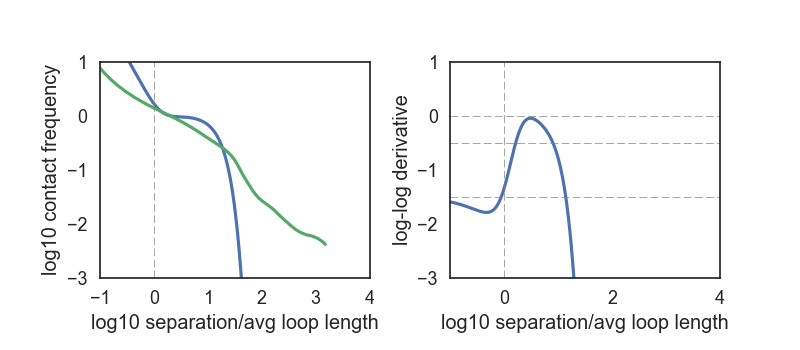

In [36]:
fig, ax = prepare_canvas(REFSC_7m)

def get_simple_bb_scaling(
    z_loop_width_step_log10_ratio,
    min_log10_s=MIN_LOG10_S, max_log10_s=MAX_LOG10_S):
    
    s = 10**np.linspace(MIN_LOG10_S,MAX_LOG10_S,1000)

    in_loop_scaling = s**(-3/2)
    
    between_loop_scaling_z = (
        st.norm.pdf(s, loc=0, scale=np.sqrt(2)*(10**z_loop_width_step_log10_ratio))    )
    
    
    between_loop_scaling = between_loop_scaling_z
    
    in_loop_scaling /= in_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]
    between_loop_scaling /= between_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]

    cp =  np.exp(-s) * in_loop_scaling + (1-np.exp(-s))* between_loop_scaling
    
    return s, cp

def plot_interactive():
    
    def update_scalings(z_loop_width_step_log10_ratio):
        s,cp = get_simple_bb_scaling(
            z_loop_width_step_log10_ratio,
            )
        ax[0].lines[0].set_data(np.log10(s), np.log10(cp))

        ax[1].lines[0].set_data(
            (np.log10(s)[1:] + np.log10(s)[:-1])/2,
            np.diff(np.log10(cp)) / np.diff(np.log10(s))
        )
        
        
    widget_z_loop_width_step_log10_ratio = widgets.FloatSlider(
        description='log10(z_loop_spread/step)',
        layout=widgets.Layout(width='50%', height='80px'),
        value=1.6,
        min=-1, 
        max=4)
    interact(update_scalings, z_loop_width_step_log10_ratio=widget_z_loop_width_step_log10_ratio)
    
plot_interactive()

# Bottle brush with RW angular loop orientation

## No drift

A bottlebrush with angular correlations of loops.
- Below the loop size the scaling is calculated as s^-3/2.
- Above the loop size, contact probability is the probability for two particles to have the same z-component and same angle.
    - The probability of an overlap in z is calculated as in (1).
    - The angular orientations of loops perform a RW, the probability of an overlap == the return probability.
    - The 2nd slider sets $log10 (RW\_step\_in\_radians / 2 \pi ) $



In [115]:
%matplotlib notebook

<IPython.core.display.Javascript object>


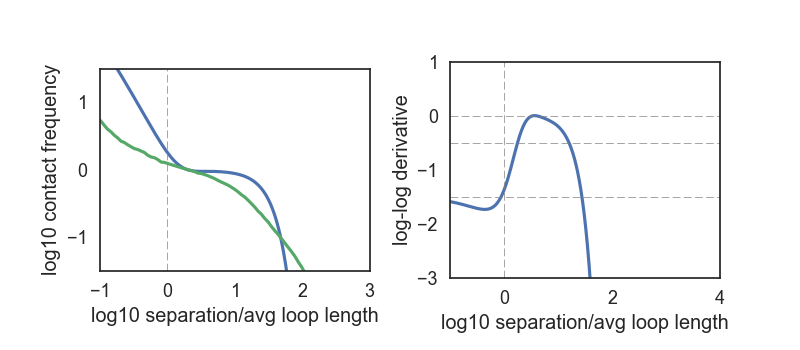

In [94]:
fig, ax =prepare_canvas(REFSC_CAPH2_R1_30m,80000)
#fig, ax =prepare_canvas(REFSC_7m,60000)

#fig, ax =prepare_canvas(REFSC_CAPH1_R2_60m, 200000)

def get_simple_bb_scaling(
    z_loop_width_step_log10_ratio,
    ang_rw_step,
    ang_loop_spread,
    min_log10_s=MIN_LOG10_S, 
    max_log10_s=MAX_LOG10_S):
    
    s = 10**np.linspace(MIN_LOG10_S,MAX_LOG10_S,1000)

    in_loop_scaling = s**(-3/2)

    between_loop_scaling_z = (
        st.norm.pdf(s, loc=0, scale=np.sqrt(2)*(10**z_loop_width_step_log10_ratio))    )
    
    between_loop_scaling_ang = np.vstack(
        st.norm.pdf(x , loc=0, scale=np.sqrt(2*ang_loop_spread**2+s*(ang_rw_step**2)))
        for x in 2*np.pi*np.arange(-100,100+0.1)
        ).sum(axis=0)

    between_loop_scaling = between_loop_scaling_z * between_loop_scaling_ang
    
    in_loop_scaling /= in_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]
    between_loop_scaling /= between_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]

    cp =  np.exp(-s) * in_loop_scaling + (1-np.exp(-s)) * between_loop_scaling

    return s, cp

def plot_interactive():
    
    def update_scalings(z_loop_width_step_log10_ratio,ang_rw_step,ang_loop_spread):
        ang_rw_step = 2 * np.pi * (10**ang_rw_step)
        ang_loop_spread = 2 * np.pi * (10**ang_loop_spread)
        s,cp = get_simple_bb_scaling(
            z_loop_width_step_log10_ratio,
            ang_rw_step,
            ang_loop_spread
            )
        ax[0].lines[0].set_data(np.log10(s), np.log10(cp))

        ax[1].lines[0].set_data(
            (np.log10(s)[1:] + np.log10(s)[:-1])/2,
            np.diff(np.log10(cp)) / np.diff(np.log10(s))
        )
        
        
    widget_z_loop_width_step_log10_ratio = widgets.FloatSlider(
        description='log10(z_loop_spread/step)',
        layout=widgets.Layout(width='50%', height='80px'),
        value=1.4, #WT-7m 6kb
        #value=1.4,
        min=-4, 
        max=4)
    widget_ang_rw_step = widgets.FloatSlider(
        description='log10 (ang_rw_step / 2 Pi)',
        layout=widgets.Layout(width='50%', height='80px'),
        value=-1.1, #WT-7m 6kb
        #value=-1.1,
        min=-4, 
        max=0)
    widget_ang_loop_spread = widgets.FloatSlider(
        description='log10 (ang_loop_spread / 2 Pi)',
        layout=widgets.Layout(width='50%', height='80px'),
        value=-1.7, #WT-7m 60kb
        #value=-1.3,
        min=-4, 
        max=0)
    interact(
        update_scalings, 
        z_loop_width_step_log10_ratio=widget_z_loop_width_step_log10_ratio,
        ang_rw_step=widget_ang_rw_step,
        ang_loop_spread=widget_ang_loop_spread
    )
    ax[0].set_ylim(-1.5,1.5)
    ax[0].set_xlim(-1,3)
    #plt.savefig(f'{FIG_FOLDER}/coarse_grained_RW_scaling_7m_60kb.svg')
    
plot_interactive()

## With drift

A bottlebrush with angular correlations and drift of loops.
- Same as (2), but with a drift component.
    - The 3rd slider sets $log10 (angular\_drift\_per\_loop\_in\_radians / 2 \pi ) $. The inverse of this number is the period of the spiral in loops.



<IPython.core.display.Javascript object>


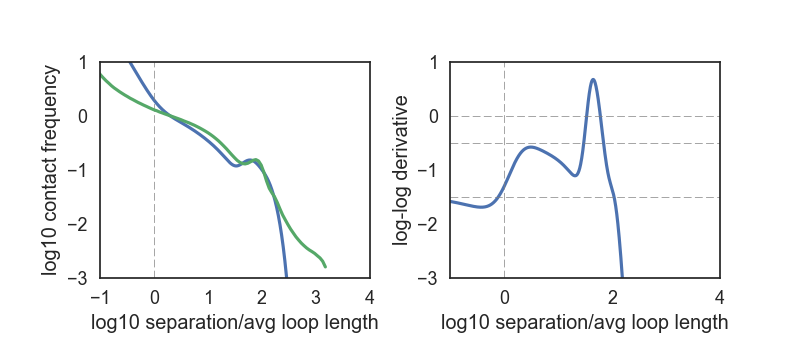

In [39]:
fig, ax =prepare_canvas(REFSC_30m)

def get_simple_bb_scaling(
    z_loop_width_step_log10_ratio,
    ang_rw_step,
    ang_drift_step,
    min_log10_s=MIN_LOG10_S, 
    max_log10_s=MAX_LOG10_S):
    
    s = 10**np.linspace(MIN_LOG10_S,MAX_LOG10_S,1000)

    in_loop_scaling = s**(-3/2)

    between_loop_scaling_z = (
        st.norm.pdf(s, loc=0, scale=np.sqrt(2)*(10**z_loop_width_step_log10_ratio))    )

    between_loop_scaling_ang = np.vstack(
        st.norm.pdf(x , loc=ang_drift_step*s, scale=ang_rw_step*np.sqrt(s))
        for x in 2*np.pi*np.arange(-100,100+0.1)
    ).sum(axis=0)

    between_loop_scaling = between_loop_scaling_ang * between_loop_scaling_z
    
    in_loop_scaling /= in_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]
    between_loop_scaling /= between_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]


    cp =  np.exp(-s) * in_loop_scaling + (1-np.exp(-s)) * between_loop_scaling

    return s, cp

def plot_interactive():
    
    def update_scalings(z_loop_width_step_log10_ratio,ang_rw_step,ang_drift_step):
        ang_rw_step = 2 * np.pi * (10**ang_rw_step)
        ang_drift_step = 2 * np.pi * (10**ang_drift_step)
        s,cp = get_simple_bb_scaling(
            z_loop_width_step_log10_ratio,
            ang_rw_step,
            ang_drift_step,
            )
        ax[0].lines[0].set_data(np.log10(s), np.log10(cp))

        ax[1].lines[0].set_data(
            (np.log10(s)[1:] + np.log10(s)[:-1])/2,
            np.diff(np.log10(cp)) / np.diff(np.log10(s))
        )
        
        
    widget_z_loop_width_step_log10_ratio = widgets.FloatSlider(
        description='log10(z_loop_spread/step)',
        layout=widgets.Layout(width='75%', height='80px'),
        value=1.8,
        min=-4, 
        max=4)
    widget_ang_rw_step = widgets.FloatSlider(
        description='log10 (ang_rw_step / 2 Pi)',
        layout=widgets.Layout(width='75%', height='80px'),
        value=-1.4,
        min=-4, 
        max=0)
    widget_ang_drift_step = widgets.FloatSlider(
        description='log10 (ang_drift_step / 2 Pi)',
        layout=widgets.Layout(width='75%', height='80px'),
        value=-2.0,
        min=-4, 
        max=0)

    interact(
        update_scalings, 
        z_loop_width_step_log10_ratio=widget_z_loop_width_step_log10_ratio,
        ang_rw_step=widget_ang_rw_step,
        ang_drift_step=widget_ang_drift_step)
    

plot_interactive()

# Bottle brush with OU angular loop orientation (approximate)

A bottlebrush with angular correlations of loops.
- Below the loop size the scaling is calculated as s^-3/2.
- Above the loop size, contact probability is the probability for two particles to have the same z-component and same angle.
    - The probability of an overlap in z is calculated as in (1).
    - The angular orientations of loops perform a contrained random walk with a drift (trending Ornstein Uhlenbeck process). The probability of an overlap == the return probability.
    - The 2nd slider sets log10 standard deviation of angular spread for loops emanating from the same anchor / $2\pi$.
    - The 3nd slider sets log10 characteristic length scale of angular loop correlations (in number of loops)
    - The 4th slider sets $log10 (angular\_drift\_per\_loop\_in\_radians / 2 \pi ) $. The inverse of this number is the period of the spiral in loops.


References:
- trending Ornstein-Uhlenbeck (http://web.mit.edu/wangj/www/pap/LoWang95.pdf, page 35)

<IPython.core.display.Javascript object>


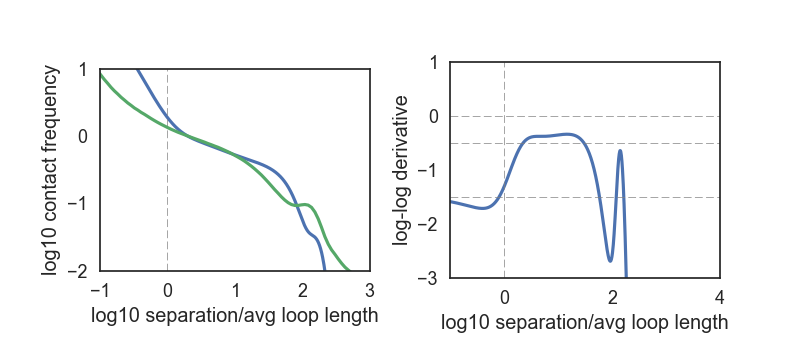

In [96]:
fig, ax =prepare_canvas(REFSC_60m, 80000)
#fig, ax =prepare_canvas(REFSC_30m, 80000)
#fig, ax =prepare_canvas(REFSC_CAPH1_R2_30m, 200000)
#fig, ax =prepare_canvas(REFSC_CAPH1_R2_60m, 200000)

def get_simple_bb_scaling(
    z_loop_width_step_log10_ratio,
    ang_rw_step,
    ang_loop_spread,
    ang_drift_step,
    ang_rw_return_scale,
    min_log10_s=MIN_LOG10_S, 
    max_log10_s=MAX_LOG10_S):
    
    s = 10**np.linspace(MIN_LOG10_S,MAX_LOG10_S,1000)

    in_loop_scaling = s**(-3/2)

    between_loop_scaling_z = (
        st.norm.pdf(s, loc=0, scale=np.sqrt(2)*(10**z_loop_width_step_log10_ratio))    )
    between_loop_scaling_z /= between_loop_scaling_z[np.argmin(np.abs(np.log10(s/GLUE_AT)))]
          
    between_loop_scaling_ang = np.vstack(
        st.norm.pdf(x , 
                    loc=ang_drift_step*s, 
                    scale=np.sqrt(2*ang_loop_spread**2
                                  +
                                  (ang_rw_step**2)*(1-np.exp(-s/ang_rw_return_scale)) * ang_rw_return_scale )
                   )
        for x in 2*np.pi*np.arange(-100,100+0.1)
    ).sum(axis=0)
    
    between_loop_scaling = between_loop_scaling_ang * between_loop_scaling_z
    
    in_loop_scaling /= in_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]
    between_loop_scaling /= between_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]

    cp = np.exp(-s) * in_loop_scaling + (1-np.exp(-s)) * between_loop_scaling

    return s, cp

def plot_interactive():
    
    def update_scalings(z_loop_width_step_log10_ratio,ang_rw_stat_std,ang_rw_return_scale,ang_loop_spread,ang_drift_step):
        ang_rw_stat_std = 2 * np.pi * (10**ang_rw_stat_std)
        ang_rw_return_scale = 10 ** (ang_rw_return_scale)
        ang_loop_spread = 2 * np.pi * (10**ang_loop_spread)
        ang_drift_step = 2 * np.pi * (10**ang_drift_step)
        ang_rw_step = ang_rw_stat_std * np.sqrt(ang_rw_return_scale)
        s,cp = get_simple_bb_scaling(
            z_loop_width_step_log10_ratio,
            ang_rw_step,
            ang_loop_spread,
            ang_drift_step,
            ang_rw_return_scale
            )

        ax[0].lines[0].set_data(np.log10(s), np.log10(cp))

        ax[1].lines[0].set_data(
            (np.log10(s)[1:] + np.log10(s)[:-1])/2,
            np.diff(np.log10(cp)) / np.diff(np.log10(s))
        )
        
        
    widget_z_loop_width_step_log10_ratio = widgets.FloatSlider(
        description='log10(z_loop_spread/step)',
        layout=widgets.Layout(width='75%', height='80px'),
        #value=1.65, #WT-30m
        value=1.75, #WT-60m
        #value=1.57, #CAPH1-R2-30m 200kb
        #value=1.30, #CAPH1-R2-30m 400kb
        min=-4, 
        step=0.025,
        max=4)
    widget_ang_rw_stat_std = widgets.FloatSlider(
        description='log10 (ang_rw_stat_std / 2 Pi)',
        layout=widgets.Layout(width='75%', height='80px'),
        #value=-1.7, #WT-30m,
        value=-1.65, #WT-60m
        #value=-1.45, #CAPH2-30m
        #value=-1.4, #CAPH2-R2-30m 400kb
        min=-2, 
        step=0.025,

        max=0)
    widget_ang_loop_spread = widgets.FloatSlider(
        description='log10 (ang_loop_spread / 2 Pi)',
        layout=widgets.Layout(width='50%', height='80px'),
        #value=-1.4, #WT-30m
        value=-1.675, #WT-60m
        #value=-1.1, #CAPH1-R2-30m 200kb
        #value=-0.9, #CAPH1-R2-30m 400kb
        min=-4, 
        max=0)
    widget_ang_rw_return_scale = widgets.FloatSlider(
        description='log10 (ang_rw_return_scale)',
        layout=widgets.Layout(width='75%', height='80px'),
        #value=1.15, #WT-30m
        value=1.05, #WT-60m
        #value=1.00, #CAPH1-R2-30m 200kb
        #value=0.95, #CAPH1-R2-30m 400kb
        

        step=0.025,
        
        min=0, 
        max=4)
    widget_ang_drift_step = widgets.FloatSlider(
        description='log10 (ang_drift_step / 2 Pi)',
        layout=widgets.Layout(width='75%', height='80px'),
        step=0.025,
        
        #value=-1.975, #WT-30m
        value=-2.15, #WT-60m
        #value=-1.7, #CAPH1-R2-30m 200kb
        #value=-1.425, #CAPH1-R2-30m 400kb
        min=-4, 
        max=0)

    interact(
        update_scalings, 
        z_loop_width_step_log10_ratio=widget_z_loop_width_step_log10_ratio,
        ang_rw_stat_std=widget_ang_rw_stat_std,
        ang_loop_spread=widget_ang_loop_spread,
        ang_rw_return_scale=widget_ang_rw_return_scale,
        ang_drift_step=widget_ang_drift_step)

    ax[0].set_ylim(-2,1)
    ax[0].set_xlim(-1,3)
    #plt.savefig(f'{FIG_FOLDER}/coarse_grained_RW_scaling_WT-30m-80kb.svg')
    #plt.savefig(f'{FIG_FOLDER}/coarse_grained_RW_scaling_WT-60m-80kb.svg')
    #plt.savefig(f'{FIG_FOLDER}/coarse_grained_RW_scaling_CAPH1-R2-30m-200kb.svg')

    

plot_interactive()



# Experimental

In [46]:
%matplotlib notebook

In [32]:
def simulate_trending_ou(
    N, ang_rw_stat_std,ang_rw_return_scale,ang_loop_spread,ang_drift_step):
    
    ang_rw_stat_std = 2 * np.pi * (10**ang_rw_stat_std)
    ang_rw_return_scale = 10 ** (ang_rw_return_scale)
    ang_loop_spread = 2 * np.pi * (10**ang_loop_spread)
    ang_drift_step = 2 * np.pi * (10**ang_drift_step)
    ang_rw_step = ang_rw_stat_std * np.sqrt(ang_rw_return_scale)
    
    angles = [0]
    for i in range(1,N):
        new_ang = angles[i-1] + ang_drift_step - (angles[i-1] - ang_drift_step * i) / ang_rw_return_scale + np.random.normal(scale=ang_rw_step)
        angles.append(new_ang)
        
    return angles
        
        


In [34]:
ang_rw_stat_std = -1.675
ang_rw_return_scale = 1.125
ang_loop_spread = -1.3
ang_drift_step = -1.975

# ang_rw_stat_std = -1.75
# ang_rw_return_scale = 1.38
# ang_loop_spread = -0.7
# ang_drift_step = -1.77

ang_rw_stat_std = 2 * np.pi * (10**ang_rw_stat_std)
ang_rw_return_scale = 10 ** (ang_rw_return_scale)
ang_loop_spread = 2 * np.pi * (10**ang_loop_spread)
ang_drift_step = 2 * np.pi * (10**ang_drift_step)

ang_rw_step = ang_rw_stat_std * np.sqrt(ang_rw_return_scale)
print(ang_rw_step / 2 / np.pi)

0.0771791515585


In [ ]:

ang_rw_stat_std = 2 * np.pi * (10**ang_rw_stat_std)
ang_rw_return_scale = 10 ** (ang_rw_return_scale)
ang_loop_spread = 2 * np.pi * (10**ang_loop_spread)
ang_drift_step = 2 * np.pi * (10**ang_drift_step)

ang_rw_step = ang_rw_stat_std * np.sqrt(ang_rw_return_scale)
print(ang_rw_step / 2 / np.pi)

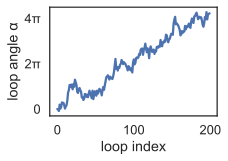

In [33]:
%matplotlib inline
plt.figure(figsize=(3,2))
angles = np.array(simulate_trending_ou(
    N=200, 
    ang_rw_stat_std=-1.675,
    ang_rw_return_scale=1.125,
    ang_loop_spread=-1.3,
    ang_drift_step=-1.975,
    ))
plt.plot(
    angles
)
plt.yticks(np.arange(0,3)*2*np.pi, [('{}π'.format(i) if i>0 else '0') for i in 2*np.arange(0,4) ] )
plt.ylabel('loop angle α')
plt.xlabel('loop index')

    
#plt.savefig(f'{FIG_FOLDER}/coarse_grained_OURW_example_loop_angles.pdf',
#             bbox_inches='tight')

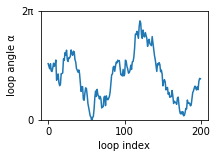

In [61]:
%matplotlib inline
rw_step = 0.1*np.pi
plt.figure(figsize=(3,2))
angles = np.pi+ np.cumsum(np.random.normal(scale=rw_step,size=200))
plt.plot(
    angles
)
plt.yticks(np.arange(0,3)*2*np.pi, [('{}π'.format(i) if i>0 else '0') for i in 2*np.arange(0,4) ] )
plt.ylabel('loop angle α')
plt.xlabel('loop index')
plt.ylim(0,2*np.pi)

    
#plt.savefig(f'{FIG_FOLDER}/coarse_grained_RW_example_loop_angles.pdf',
#             bbox_inches='tight')

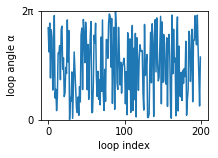

In [66]:
%matplotlib inline
plt.figure(figsize=(3,2))
angles = np.array(np.random.random(200)*2*np.pi)
plt.plot(
    angles
)
plt.yticks(np.arange(0,2)*2*np.pi, [('{}π'.format(i) if i>0 else '0') for i in 2*np.arange(0,4) ] )
plt.ylabel('loop angle α')
plt.xlabel('loop index')
plt.ylim(0,2*np.pi)

    
#plt.savefig(f'{FIG_FOLDER}/coarse_grained_random_example_loop_angles.pdf',
#             bbox_inches='tight')

In [ ]:
%matplotlib inline
plt.figure(figsize=(4,2))
angles = np.array(simulate_trending_ou(200,-1.675, 1.125, -1.3, -1.975))
full_circle_points = np.r_[0, 1+np.where(angles[1:] // (2 * np.pi) != angles[:-1] // (2 * np.pi))[0], len(angles)]
for i,j in zip(full_circle_points[:-1], full_circle_points[1:]):
    plt.plot(
        np.arange(i,j), 
        np.mod(angles[i:j], 2*np.pi)
    )
plt.yticks(np.arange(0,3)*2*np.pi, [('{}π'.format(i) if i>0 else '0') for i in 2*np.arange(0,4) ] )
plt.ylabel('loop angle α')
plt.ylim(0,2*np.pi)
plt.show()

In [68]:
np.arange(i,j)

array([51])

In [65]:
print(full_circle_points)

[  4   7  13  17  30  52  53  55  56  62  64  66  67  69  70  72  80  82
  91 102 104 117 118 119 120 135 136 138 146 148 150 157 165 171 182 193
 195 196]


In [403]:
# MIN_LOG10_S = -1
# MAX_LOG10_S = 4

# Z_LOOP_WIDTH = 50
# Z_LOOP_STEP = 1
# PERIOD_LOOPS = 100

# ANG_RW_STAT_STD = 2 * np.pi / 3
# ANG_RW_RETURN_COEFF = 1.0/30

# ANG_DRIFT_STEP = 2 * np.pi / PERIOD_LOOPS
# ANG_RW_STEP = ANG_RW_STAT_STD * np.sqrt(ANG_RW_RETURN_COEFF)


# Bottle brush with random angular loop orientation

A simple bottlebrush w/o angular correlations of loops.
- Below the loop size the scaling is calculated as s^-3/2.
- Above the loop size, contact probability is the probability for two particles to have the same z-component.
    - The z-coordinates of the particles of a loop are normally distributed around the z-coordinate of its base with $\sigma$.
    - The z-coordinate of a loop base is incremented by $\delta$.
    - The slider sets $log10(\sigma / \delta)$

References: 
-- an overlap of two gaussians: http://www.tina-vision.net/docs/memos/2003-003.pdf

<IPython.core.display.Javascript object>


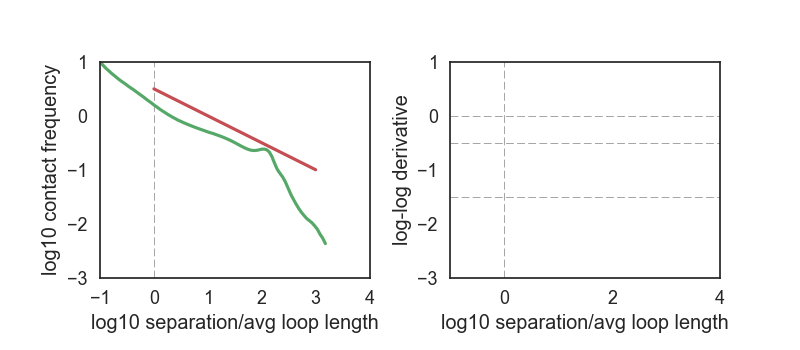

In [41]:
fig, ax =prepare_canvas(REFSC_CAPH1_R2_30m)

def get_simple_bb_scaling(
    z_loop_width_step_log10_ratio,
    ang_rw_step,
    ang_drift_step,
    ang_rw_return_scale,
    min_log10_s=MIN_LOG10_S, 
    max_log10_s=MAX_LOG10_S):
    
    s = 10**np.linspace(MIN_LOG10_S,MAX_LOG10_S,1000)

    in_loop_scaling = s**(-3/2)

    between_loop_scaling_z = (
        st.norm.pdf(s, loc=0, scale=np.sqrt(2)*(10**z_loop_width_step_log10_ratio))    )
    
    
    between_loop_scaling_ang = np.vstack(
        st.norm.pdf(x , 
                    loc=ang_drift_step*s, 
                    scale=np.sqrt(
                        ang_loop_spread**2
                        +
                        (ang_rw_step**2)*(ang_rw_return_scale**2)*(1-np.exp(-s/ang_rw_return_scale)))
                   )
        for x in 2*np.pi*np.arange(-100,100+0.1)
    ).sum(axis=0)
    
    between_loop_scaling =  between_loop_scaling_ang * between_loop_scaling_z
    
    in_loop_scaling /= in_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]
    between_loop_scaling /= between_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]

    cp = np.exp(-s) * in_loop_scaling + (1-np.exp(-s)) * between_loop_scaling

    return s, cp

def plot_interactive():
    
    def update_scalings(z_loop_width_step_log10_ratio,ang_rw_stat_std,ang_rw_return_scale,ang_drift_step):
        ang_rw_stat_std = 2 * np.pi * (10**ang_rw_stat_std)
        ang_rw_return_scale = 10 ** (ang_rw_return_scale)
        ang_drift_step = 2 * np.pi * (10**ang_drift_step)
        ang_rw_step = ang_rw_stat_std * np.sqrt(ang_rw_return_scale)
        s,cp = get_simple_bb_scaling(
            z_loop_width_step_log10_ratio,
            ang_rw_step,
            ang_drift_step,
            ang_rw_return_scale
            )

        ax[0].lines[0].set_data(np.log10(s), np.log10(cp))

        ax[1].lines[0].set_data(
            (np.log10(s)[1:] + np.log10(s)[:-1])/2,
            np.diff(np.log10(cp)) / np.diff(np.log10(s))
        )
        
        
    widget_z_loop_width_step_log10_ratio = widgets.FloatSlider(
        description='log10(z_loop_spread/step)',
        layout=widgets.Layout(width='75%', height='80px'),
        value=1.65,
        min=-4, 
        step=0.025,
        max=4)
    widget_ang_rw_stat_std = widgets.FloatSlider(
        description='log10 (ang_rw_stat_std / 2 Pi)',
        layout=widgets.Layout(width='75%', height='80px'),
        value=-1.675,
        min=-2, 
        step=0.025,

        max=0)
    widget_ang_rw_return_scale = widgets.FloatSlider(
        description='log10 (ang_rw_return_scale)',
        layout=widgets.Layout(width='75%', height='80px'),
        value=1.125,
        step=0.025,
        
        min=0, 
        max=4)
    widget_ang_drift_step = widgets.FloatSlider(
        description='log10 (ang_drift_step / 2 Pi)',
        layout=widgets.Layout(width='75%', height='80px'),
        step=0.025,
        
        value=-1.975,
        min=-4, 
        max=0)

    interact(
        update_scalings, 
        z_loop_width_step_log10_ratio=widget_z_loop_width_step_log10_ratio,
        ang_rw_stat_std=widget_ang_rw_stat_std,
        ang_rw_return_scale=widget_ang_rw_return_scale,
        ang_drift_step=widget_ang_drift_step)
    
ax[0].plot([0,3],[0.5,-1])
plot_interactive()

<IPython.core.display.Javascript object>


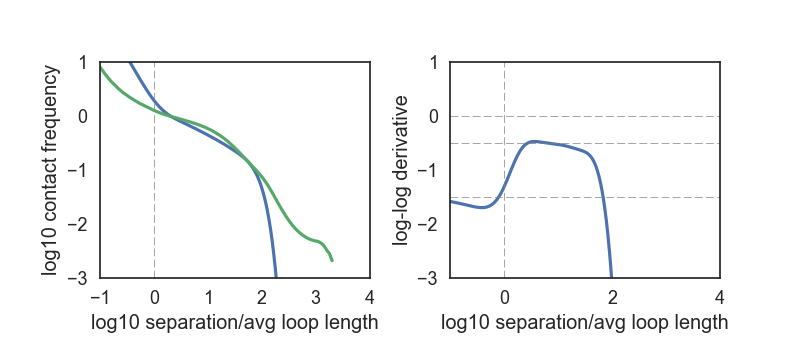

In [38]:
fig, ax =prepare_canvas(REFSC_CAPH2_R2_30m, 60000)

def get_simple_bb_scaling(
    z_loop_width_step_log10_ratio,
    ang_rw_step,
    min_log10_s=MIN_LOG10_S, 
    max_log10_s=MAX_LOG10_S):
    
    s = 10**np.linspace(MIN_LOG10_S,MAX_LOG10_S,1000)

    in_loop_scaling = s**(-3/2)

    between_loop_scaling_z = (
        st.norm.pdf(s, loc=0, scale=np.sqrt(2)*(10**z_loop_width_step_log10_ratio))    )
    
    between_loop_scaling_ang = np.vstack(
        st.norm.pdf(x , loc=0, scale=ang_rw_step*np.sqrt(s))
        for x in 2*np.pi*np.arange(-100,100+0.1)
        ).sum(axis=0)
    
    between_loop_scaling = between_loop_scaling_z * between_loop_scaling_ang
    
    in_loop_scaling /= in_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]
    between_loop_scaling /= between_loop_scaling[np.argmin(np.abs(np.log10(s/GLUE_AT)))]

    cp =  np.exp(-s) * in_loop_scaling + (1-np.exp(-s))* between_loop_scaling

    return s, cp

def plot_interactive():
    
    def update_scalings(z_loop_width_step_log10_ratio,ang_rw_step):
        ang_rw_step = 2 * np.pi * (10**ang_rw_step)
        s,cp = get_simple_bb_scaling(
            z_loop_width_step_log10_ratio,
            ang_rw_step,
            )
        ax[0].lines[0].set_data(np.log10(s), np.log10(cp))

        ax[1].lines[0].set_data(
            (np.log10(s)[1:] + np.log10(s)[:-1])/2,
            np.diff(np.log10(cp)) / np.diff(np.log10(s))
        )
        
        
    widget_z_loop_width_step_log10_ratio = widgets.FloatSlider(
        description='log10(z_loop_spread/step)',
        layout=widgets.Layout(width='50%', height='80px'),
        value=1.9,
        min=-4, 
        max=4)
    widget_ang_rw_step = widgets.FloatSlider(
        description='log10 (ang_rw_step / 2 Pi)',
        layout=widgets.Layout(width='50%', height='80px'),
        value=-2.4,
        min=-4, 
        max=0)
    interact(
        update_scalings, 
        z_loop_width_step_log10_ratio=widget_z_loop_width_step_log10_ratio,
        ang_rw_step=widget_ang_rw_step)
    
plot_interactive()

# Table of Contents
 <p><div class="lev1"><a href="#Bottle-brush-with-RW-angular-loop-orientation"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bottle brush with RW angular loop orientation</a></div><div class="lev2"><a href="#No-drift"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>No drift</a></div><div class="lev2"><a href="#With-drift"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>With drift</a></div><div class="lev1"><a href="#Bottle-brush-with-OU-angular-loop-orientation-(approximate)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bottle brush with OU angular loop orientation (approximate)</a></div><div class="lev1"><a href="#Experimental"><span class="toc-item-num">3&nbsp;&nbsp;</span>Experimental</a></div><div class="lev1"><a href="#Bottle-brush-with-random-angular-loop-orientation"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bottle brush with random angular loop orientation</a></div>

# Table of Contents
 <p><div class="lev1"><a href="#Bottle-brush-with-RW-angular-loop-orientation"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bottle brush with RW angular loop orientation</a></div><div class="lev2"><a href="#No-drift"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>No drift</a></div><div class="lev2"><a href="#With-drift"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>With drift</a></div><div class="lev1"><a href="#Bottle-brush-with-OU-angular-loop-orientation-(approximate)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bottle brush with OU angular loop orientation (approximate)</a></div><div class="lev1"><a href="#Experimental"><span class="toc-item-num">3&nbsp;&nbsp;</span>Experimental</a></div><div class="lev1"><a href="#Bottle-brush-with-random-angular-loop-orientation"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bottle brush with random angular loop orientation</a></div>